# Example Notebook for Titanic Data

In [116]:
# Import packages
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
# See available built in dataset
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
# Load titanic dataset
df = sns.load_dataset('titanic')

In [4]:
# View data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# Check shape of data
df.shape

(891, 15)

In [6]:
# Get info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# Describe data
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Check for null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Create new df, dropping deck for too much missing data
df1 = df.drop(columns=['deck'])

In [10]:
# View data
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [11]:
# See values in sex column
df1.sex.value_counts(dropna=False)

male      577
female    314
Name: sex, dtype: int64

In [12]:
# function to recode sex column
def recode_sex(series):
    if series == 'male':
        return 1
    else:
        return 0

In [13]:
# Recode sex into new col male where 1=male, 0=female
df1['male']=df1['sex'].apply(recode_sex)

In [14]:
# Check recode
df1['male'].value_counts(dropna=False)

1    577
0    314
Name: male, dtype: int64

In [15]:
# Check data
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


In [16]:
# Fill missing age values with mean of age column
df1['age']=df1['age'].fillna(df1['age'].mean())

In [17]:
# Check for missing data again
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
male           0
dtype: int64

In [18]:
# View data
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


In [19]:
# Check unique values in sibsp
df1.sibsp.value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [20]:
# Check parch values
df1.parch.value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [21]:
# Check value counts for fare
df1.fare.value_counts(dropna=False)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

In [22]:
# Fill missing embarked data with most commmon embarked location
df1.embarked = df1.embarked.fillna(df1.embarked.mode().iloc[0])

In [23]:
# Check missing data again
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
male           0
dtype: int64

In [24]:
# Get value counts of embarked
df1.embarked.value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [25]:
# dummy code embarked variable
embark_dummies = pd.get_dummies(df1.embarked, drop_first=True)

In [26]:
# Check dummy codes
embark_dummies

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [27]:
# Concat dummies with main df to prodce new df
df2 = pd.concat([df1, embark_dummies], axis=1)

In [28]:
# Check merge results
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,0,1


In [29]:
# Get value counts of class
df2['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [30]:
# Function to recode class
def recode_class(series):
    if series == 'First':
        return 1
    elif series == 'Second':
        return 2
    elif series == 'Third':
        return 3

In [31]:
# Apply recode function to class, recode into new variable
df2['classR']=df2['class'].apply(recode_class)

In [32]:
# View updated dataframe
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,Q,S,classR
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,0,1,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,0,1,3


In [33]:
# Check value counts for who column
df2.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [34]:
# get dummies for who
who_dummies = pd.get_dummies(df2['who'], drop_first=True)

In [35]:
# Concat dummies into df and produce new df
df3 = pd.concat([df2, who_dummies], axis=1)

In [36]:
# View data
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,Q,S,classR,man,woman
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,0,1,3,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,0,1,0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1,3,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,0,1,3,1,0


In [37]:
# Get value counts for adult_male
df3.adult_male.value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [38]:
# Convert T/F into 1/0 in place
df3['adult_male'] = df3.adult_male.astype(int)

In [39]:
# Check data
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,Q,S,classR,man,woman
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,Southampton,no,False,1,0,1,3,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,Cherbourg,yes,False,0,0,0,1,0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,Southampton,yes,True,0,0,1,3,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,Southampton,yes,False,0,0,1,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,Southampton,no,True,1,0,1,3,1,0


In [40]:
# Check value counts of embark town
df3.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [41]:
# dummy code embark town
embark_town_dummies = pd.get_dummies(df3['embark_town'], drop_first=True)

In [42]:
# concat dummies and df into new df
df4 = pd.concat([df3, embark_town_dummies], axis=1)

In [43]:
# Check merge results
df4.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,male,Q,S,classR,man,woman,Queenstown,Southampton
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,False,1,0,1,3,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,False,0,0,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,True,0,0,1,3,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,False,0,0,1,1,0,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,True,1,0,1,3,1,0,0,1


In [44]:
# Check all columns
df4.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'male', 'Q', 'S', 'classR', 'man', 'woman', 'Queenstown',
       'Southampton'],
      dtype='object')

In [45]:
# check alive value counts
df4.alive.value_counts(dropna=False)

no     549
yes    342
Name: alive, dtype: int64

In [46]:
# recode alive yes/no into 1/0
def recode_alive(series):
    if series == 'yes':
        return 1
    else:
        return 0

In [47]:
# Apply recode
df4['aliveR']=df4.alive.apply(recode_alive)

In [48]:
# Check columns
df4.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'male', 'Q', 'S', 'classR', 'man', 'woman', 'Queenstown',
       'Southampton', 'aliveR'],
      dtype='object')

In [49]:
# Check value counts of alone
df4.alone.value_counts(dropna=False)

True     537
False    354
Name: alone, dtype: int64

In [50]:
# Recode alone into same variable but as int
df4['alone'] = df4['alone'].astype(int)

In [51]:
# View df
df4.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alone,male,Q,S,classR,man,woman,Queenstown,Southampton,aliveR
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,0,1,0,1,3,1,0,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,0,0,0,0,1,0,1,0,0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,1,0,0,1,3,0,1,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,0,0,0,1,1,0,1,0,1,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,1,1,0,1,3,1,0,0,1,0


In [52]:
# Select cols for analysis
keepers = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'male', 'Q', 'S', 'classR', 'man', 'woman', 'Queenstown',
       'Southampton', 'aliveR', 'survived']

In [53]:
# Subset data into new df
df5 = df4[keepers]

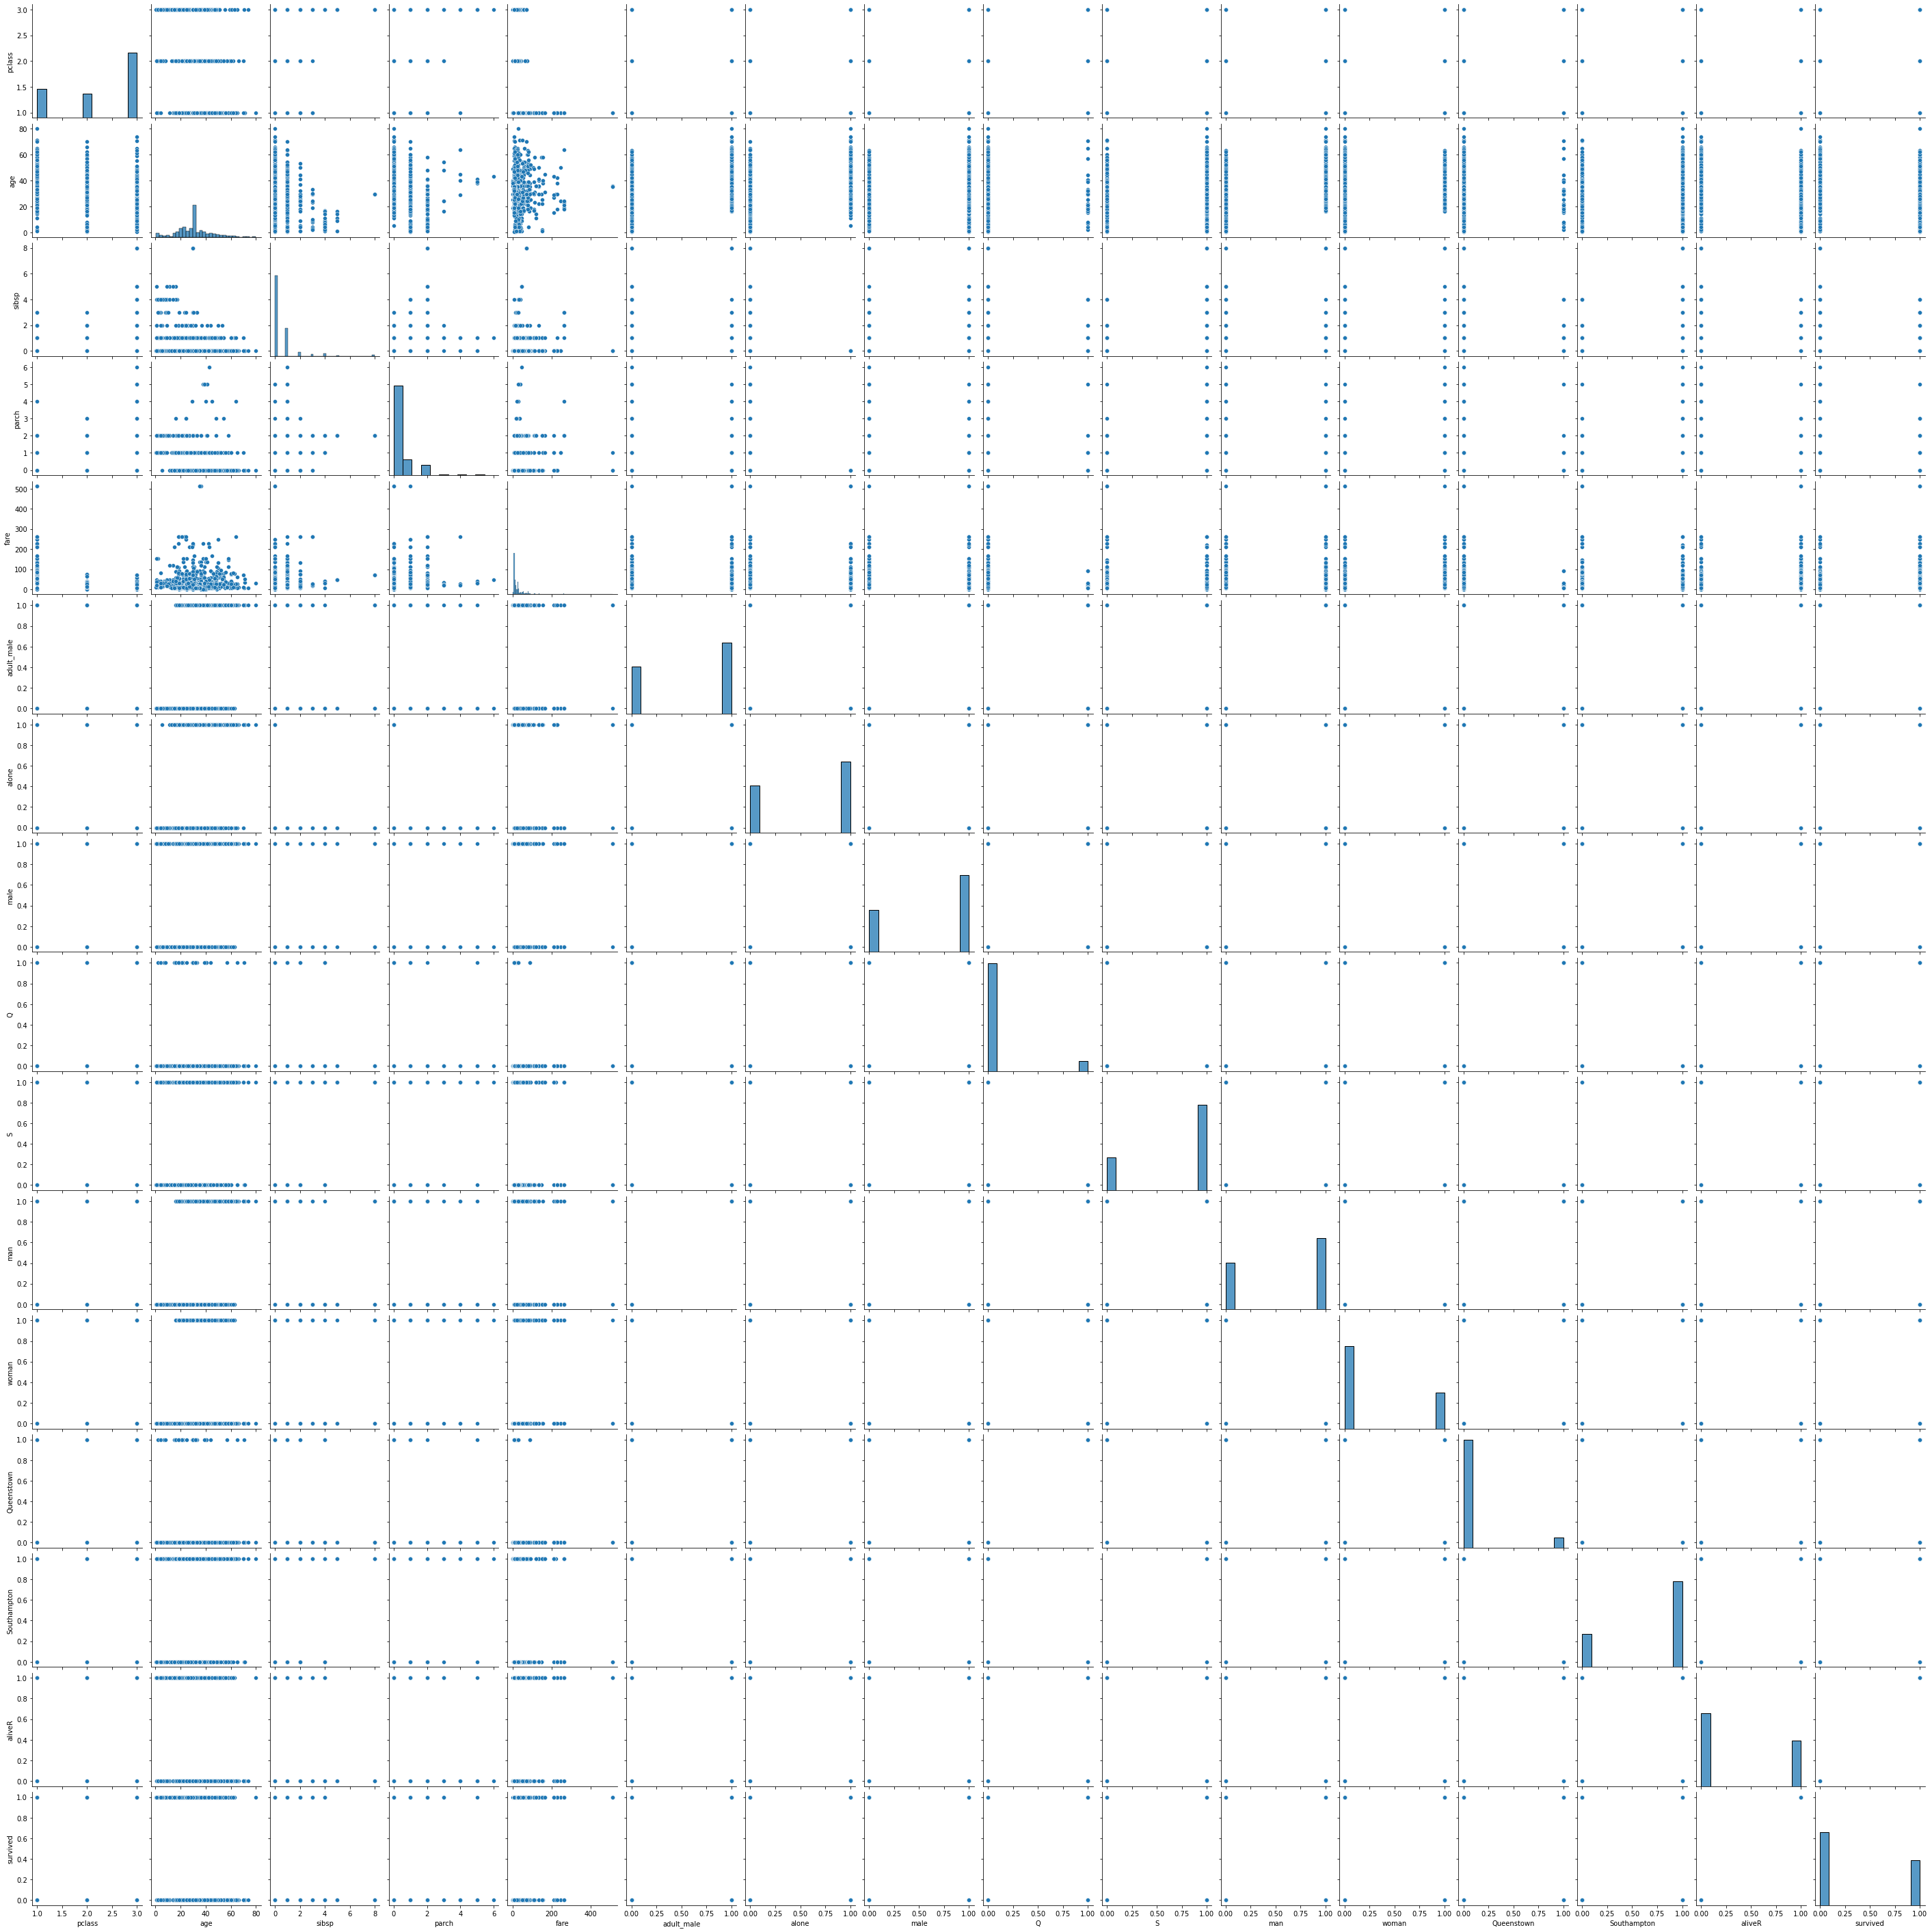

In [54]:
# Pairplot of usable data
sns.pairplot(df5)

In [55]:
# Create X, y
X = df5.drop(columns='survived')
y = df5['survived']

In [56]:
# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Instantiate classifier
clf = RandomForestClassifier()

In [58]:
# Fit classifier
clf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
# Make predictions
preds = clf.predict(X_test)

In [60]:
# Check predictions
preds

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

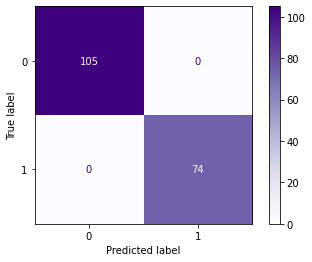

In [61]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Purples')

In [62]:
# Print classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [63]:
# Create df for feature importances
ft_imports = pd.DataFrame()

In [64]:
# Set index to feature names
ft_imports.index = clf.feature_names_in_

In [65]:
# Set values of importances
ft_imports['importance'] = clf.feature_importances_

In [66]:
# View df
ft_imports

,importance
pclass,0.023418
age,0.021998
sibsp,0.012814
parch,0.004931
fare,0.033704
adult_male,0.072324
alone,0.002168
male,0.048857
Q,0.001118
S,0.002077


<AxesSubplot:>

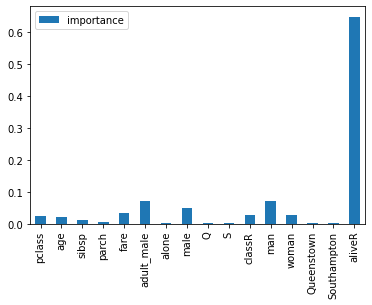

In [67]:
# Plot feature importances
ft_imports.plot(kind='bar')

# alive variable is data leakage-rerun wihthout that variable

In [68]:
# Drop additional column
X2 = X.drop(columns=['aliveR'])

In [69]:
# New train-test split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [70]:
# Instantiate new classifier
clf2 = RandomForestClassifier()

In [71]:
# Fit new classifier
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
# Make predictions
preds2 = clf2.predict(X_test)

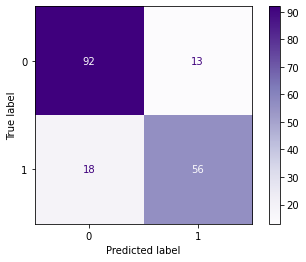

In [73]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test, cmap='Purples')

In [74]:
# Print classification report
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [75]:
# Create empty df
ft_imports2 = pd.DataFrame()

In [76]:
# Set index to feature names
ft_imports2.index = clf2.feature_names_in_

In [77]:
# Set importances as values
ft_imports2['importance']= clf2.feature_importances_

<AxesSubplot:>

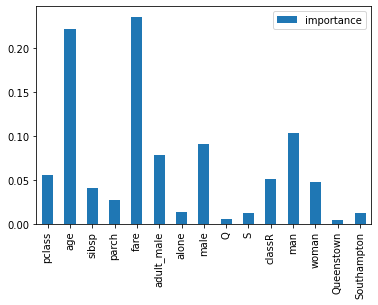

In [78]:
# Plot feature importances
ft_imports2.plot(kind='bar')

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [117]:
def run_analysis(clf, X_train, y_train, X_test, y_test, name='Classifier'):
    print(f"RUNNING ANALYSIS FOR {name}")
    my_clf = clf()
    my_clf.fit(X_train, y_train)
    my_preds = my_clf.predict(X_test)
    print(classification_report(y_test, my_preds))
    print(f"CONFUSION MATRIX FOR {name}")
    plt.show(ConfusionMatrixDisplay.from_estimator(my_clf, X_test, y_test, cmap='Purples'))
    feats = pd.DataFrame()
    feats.index = my_clf.feature_names_in_
    if hasattr(my_clf, 'feature_importances_'):    
        feats['importance'] = my_clf.feature_importances_
    else:
        feats['Betas'] = my_clf.coef_[0]
    plt.show(feats.plot(kind='bar'))
    print('\n')

In [118]:
classifiers = [LogisticRegression, DecisionTreeClassifier, ExtraTreesClassifier]
names = ['Logistic_regression', 'Decision Tree', 'Extra Trees']

RUNNING ANALYSIS FOR Logistic_regression
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

CONFUSION MATRIX FOR Logistic_regression


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


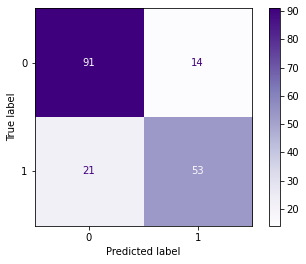

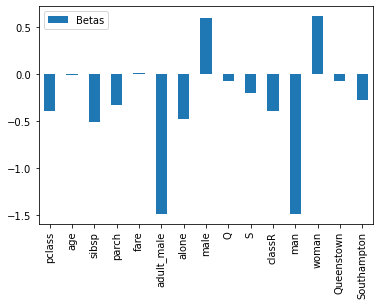



RUNNING ANALYSIS FOR Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       105
           1       0.68      0.74      0.71        74

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.75      0.75      0.75       179

CONFUSION MATRIX FOR Decision Tree


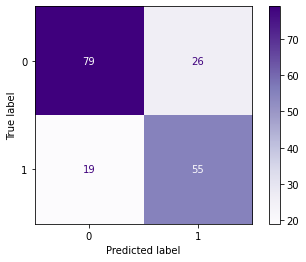

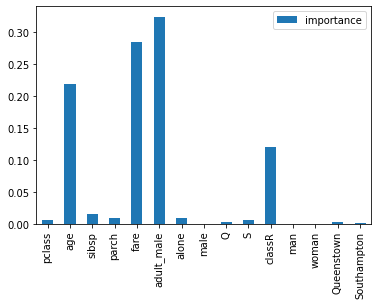



RUNNING ANALYSIS FOR Extra Trees
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

CONFUSION MATRIX FOR Extra Trees


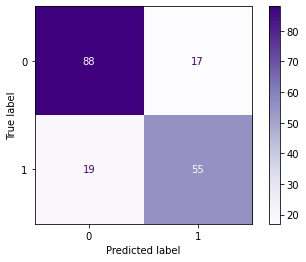

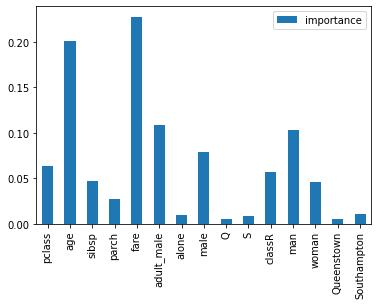

In [119]:
for classifier, name in zip(classifiers, names):
    run_analysis(classifier, X_train, y_train, X_test, y_test, name=name)